# NetworkX Tutorial

In [60]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools

from IPython.display import display

## 0. Data
__Edge List:__
* node1 & node2: names of the nodes connected.
* trail: edge attribute indicating the abbreviated name of the trail for each edge. For example: `rs = red square`
* distance: edge attribute indicating trail length in miles.
* color: trail color used for plotting.
* estimate: edge attribute indicating whether the edge distance is estimated from eyeballing the trailmap `(1=yes, 0=no)` as some distances are not provided. This is solely for reference; it is not used for analysis.

__[Source]('https://gist.githubusercontent.com/brooksandrew/e570c38bcc72a8d102422f2af836513b/raw/89c76b2563dbc0e88384719a35cba0dfc04cd522/edgelist_sleeping_giant.csv')__

__Node List:__
* id: name of the node corresponding to node1 and node2 in the edge list.
* X: horizontal position/coordinate of the node relative to the topleft.
* Y vertical position/coordinate of the node relative to the topleft.

[Source]('https://gist.githubusercontent.com/brooksandrew/f989e10af17fb4c85b11409fea47895b/raw/a3a8da0fa5b094f1ca9d82e1642b384889ae16e8/nodelist_sleeping_giant.csv')

In [61]:
# Grab edge list data hosted on Gist
edgelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/e570c38bcc72a8d102422f2af836513b/raw/89c76b2563dbc0e88384719a35cba0dfc04cd522/edgelist_sleeping_giant.csv')

# Preview edgelist
# display(edgelist.head())
display(edgelist.head()) # preview

# Grab node list data hosted on Gist
nodelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/f989e10af17fb4c85b11409fea47895b/raw/a3a8da0fa5b094f1ca9d82e1642b384889ae16e8/nodelist_sleeping_giant.csv')

display(nodelist.head()) # preview 


,node1,node2,trail,distance,color,estimate
0,rs_end_north,v_rs,rs,0.30,red,0
1,v_rs,b_rs,rs,0.21,red,0
2,b_rs,g_rs,rs,0.11,red,0
3,g_rs,w_rs,rs,0.18,red,0
4,w_rs,o_rs,rs,0.21,red,0


,id,X,Y
0,b_bv,1486,732
1,b_bw,716,1357
2,b_end_east,3164,1111
3,b_end_west,141,1938
4,b_g,1725,771


## 1. Graphs
By definition, a `Graph` is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any _hashable_ object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.


### 1.1. Creating a graph

In [62]:
G = nx.Graph() # empty graph


### 1.2. Examining elements of a graph
We can examine the nodes and edges. Four basic graph properties facilitate reporting: `G.nodes`, `G.edges`, `G.adj` and `G.degree`. These are set-like views of the nodes, edges, neighbors (adjacencies), and degrees of nodes in a graph. They offer a continually updated read-only view into the graph structure. They are also dict-like in that you can look up node and edge data attributes via the views and iterate with data attributes using methods `.items()`, `.data()`. If you want a specific container type instead of a view, you can specify one. Here we use lists, though sets, dicts, tuples and other containers may be better in other contexts.

### 1.3. Removing elements from a graph
One can remove nodes and edges from the graph in a similar fashion to adding. Use methods `Graph.remove_node()`, `Graph.remove_nodes_from()`, `Graph.remove_edge()` and `Graph.remove_edges_from()`, e.g.
    
```python
G.remove_node(1)
G.remove_nodes_from([2,3])

G.remove_edge(1, 2)
G.remove_edges_from([(1, 2), (1, 3)])
```


# 2. Nodes
The graph G can be grown in several ways. NetworkX includes many graph generator functions and facilities to read and write graphs in many formats. To get started though we’ll look at simple manipulations.

## 2.1. Adding nodes
2.1.1 We can add one node at a time.

`G.add_node(1)`

2.1.2 We can add from any iterable container such as list of nodes.

`G.add_nodes_from([2, 3])`

2.1.3 We can add nodes along with node attributes if your container yields 2-tuples (node, node_attribute_dict).

```python
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])
```

2.1.4 Nodes from one graph can be incorporated into another

```python
H = nx.path_graph(10)
G.add_nodes_from(H)
```

G now contains the nodes of H as nodes of G

2.1.5 In contrast, you could use the graph H as a node in G.

`G.add_node(H)`

2.1.6 Add nodes and attributes from dataframes

```python 
for i, nodelist_row in nodelist.iterrows(): 
    G.add_node(nodelist_row['id'], **(nodelist_row[1:].to_dict()))
```


## 2.2. Examining nodes
2.2.1 We can examine single nodes or all nodes.

```python
G.nodes[1]
G.nodes[1]['room']
G.nodes(data=True)
list(G.nodes(data=True))[0:1] 
```

2.2.2 We can select nodes base don attribute value.

```python
selected = [n for n, d in G.nodes(data=True) if 'color' in d and d['color'] == 'red']
```

In [63]:
#@title Nodes
# Add one node at a time
G.add_node(1)
print(G.nodes())
print(list(G.nodes()))
      
# Add a list of nodes
G.add_nodes_from([2, 3])
print(G.nodes())

# Add nodes along with node attributes
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])
print(G.nodes(data=True))
print(G.nodes(data=True)[4]["color"])

# Add nodes from another graph
H = nx.path_graph(10)
G.add_nodes_from(H)
print(G.nodes(data=True))

# Add the graph H as a node in G
G.add_node(H)
print(G.nodes(data=True))

# Find "red" nodes
print('List of red nodes:', [n for n, d in G.nodes(data=True) if "color" in d and d["color"] == "red"])

# Add nodes and attributes from dataframes
G.clear()
for i, nodelist_row in nodelist.iterrows(): 
    G.add_node(nodelist_row['id'], **(nodelist_row[1:].to_dict()))
    
print(G.nodes(data=True)[nodelist_row['id']])
print(list(G.nodes(data=True))[0:1])

[1]
[1]
[1, 2, 3]
[(1, {}), (2, {}), (3, {}), (4, {'color': 'red'}), (5, {'color': 'green'})]
red
[(1, {}), (2, {}), (3, {}), (4, {'color': 'red'}), (5, {'color': 'green'}), (0, {}), (6, {}), (7, {}), (8, {}), (9, {})]
[(1, {}), (2, {}), (3, {}), (4, {'color': 'red'}), (5, {'color': 'green'}), (0, {}), (6, {}), (7, {}), (8, {}), (9, {}), (<networkx.classes.graph.Graph object at 0x15a96db10>, {})]
List of red nodes: [4]
{'X': 977, 'Y': 1666}
[('b_bv', {'X': 1486, 'Y': 732})]


## 3. Edges
A graph’s edges are contained in `G.edges`. Edges are represented as links between nodes with optional key/value attributes. The following are the basic operations for edges.

## 3.1. Adding edges
3.1.1 We can add one edge at a time

```python
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e) # unpack edge tuple*
```

3.1.2 We can add a list of edges

```python
G.add_edges_from([(1, 2), (1, 3)])
```

3.1.3 We can add edges along with edge attributes

```python
G.add_edges_from([
    (2, 3, {"color": "blue"}),
    (3, 4, {"weight": 8}),
])
```

3.1.4 We can add edges from another graph

```python
G.add_edges_from(H.edges)
```

3.1.5 We can add edges from an edge list

```python
edgelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/e570c38bcc72a8d102422f2af836513b/raw/89c76b2563dbc0e88384719a35cba0dfc04cd522/edgelist_sleeping_giant.csv') 
G.add_edges_from(zip(edgelist.node1, edgelist.node2))
```

3.1.6 We can add edges from a dataframe

```python
for i, edgelist_row in edgelist.iterrows(): 
    G.add_edge(edgelist_row['node1'], edgelist_row['node2'], **(edgelist_row[2:].to_dict()))
```

## 3.2. Examining edges
3.2.1 We can examine single edges or all edges.

```python
G.edges[1, 2]
G.edges[1, 2]['color']
G.edges(data=True)
list(G.edges(data=True))[0:1] 
```

3.2.2 We can select edges base don attribute value.

```python
selected = [(u, v) for u, v, d in G.edges(data=True) if d['color'] == 'red']
```

## 3.3. Removing edges
3.3.1 We can remove one edge at a time.

```python
G.remove_edge(1, 2)
```

3.3.2 We can remove a list of edges.

```python
G.remove_edges_from([(1, 2), (1, 3)])
```

3.3.3 We can remove all edges.

```python
G.clear()
```


In [64]:
#@title Edges
G.clear()
# Add one edge at a time
G.add_edge(1, 2)
print(G.edges())

# Add a list of edges
G.add_edges_from([(1, 2), (1, 3)])
print(G.edges())

# Add edges along with edge attributes
G.add_edges_from([
    (2, 3, {"color": "blue"}),
    (3, 4, {"weight": 8}),
])
print(G.edges(data=True))

# Add edges from another graph
H = nx.path_graph(10)
G.add_edges_from(H.edges)
print(G.edges(data=True))

# Add edges from an edge list
edgelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/e570c38bcc72a8d102422f2af836513b/raw/89c76b2563dbc0e88384719a35cba0dfc04cd522/edgelist_sleeping_giant.csv')
G.add_edges_from(zip(edgelist.node1, edgelist.node2))
print(G.edges(data=True))

# Add edges from a dataframe
G.clear()
for i, edgelist_row in edgelist.iterrows(): 
    G.add_edge(edgelist_row['node1'], edgelist_row['node2'], **(edgelist_row[2:].to_dict()))
    
# print(G.edges(data=True)[(edgelist_row['node1'], edgelist_row['node2'])])
print(G.edges(data=True))

[(1, 2)]
[(1, 2), (1, 3)]
[(1, 2, {}), (1, 3, {}), (2, 3, {'color': 'blue'}), (3, 4, {'weight': 8})]
[(1, 2, {}), (1, 3, {}), (1, 0, {}), (2, 3, {'color': 'blue'}), (3, 4, {'weight': 8}), (4, 5, {}), (5, 6, {}), (6, 7, {}), (7, 8, {}), (8, 9, {})]
[(1, 2, {}), (1, 3, {}), (1, 0, {}), (2, 3, {'color': 'blue'}), (3, 4, {'weight': 8}), (4, 5, {}), (5, 6, {}), (6, 7, {}), (7, 8, {}), (8, 9, {}), ('rs_end_north', 'v_rs', {}), ('v_rs', 'b_rs', {}), ('v_rs', 'v_bv', {}), ('v_rs', 'v_end_east', {}), ('b_rs', 'g_rs', {}), ('b_rs', 'b_bv', {}), ('b_rs', 'b_g', {}), ('g_rs', 'w_rs', {}), ('g_rs', 'g_rc', {}), ('g_rs', 'b_g', {}), ('w_rs', 'o_rs', {}), ('w_rs', 'o_w_2', {}), ('w_rs', 'b_w', {}), ('o_rs', 'y_rs', {}), ('o_rs', 'o_w_2', {}), ('o_rs', 'o_gy2', {}), ('y_rs', 'rs_end_south', {}), ('y_rs', 'y_rc', {}), ('y_rs', 'y_gy2', {}), ('rc_end_north', 'v_rc', {}), ('v_rc', 'b_rc', {}), ('v_rc', 'v_rt', {}), ('v_rc', 'v_bv', {}), ('b_rc', 'g_rc', {}), ('b_rc', 'b_tt_3', {}), ('b_rc', 'b_bv', {}), 

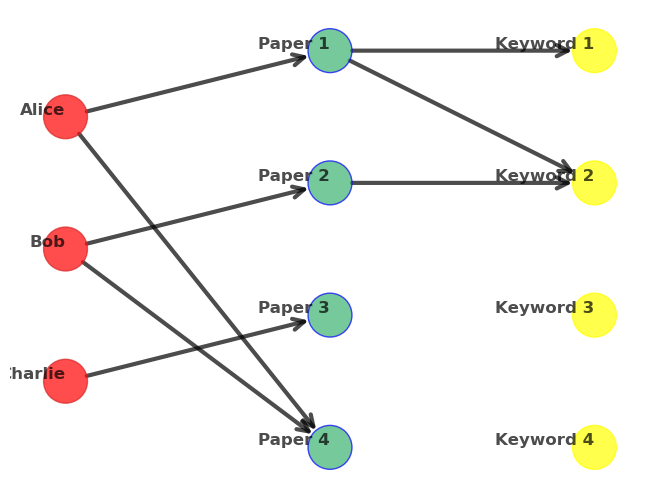

In [70]:
# 4. Draw multipartite graph

# Node sets (adjust names and sizes as needed)
authors = ["Alice", "Bob", "Charlie"]
papers = ["Paper 1", "Paper 2", "Paper 3", "Paper 4"]
keywords = ["Keyword 1", "Keyword 2", "Keyword 3", "Keyword 4"]

# Edges (update with your connections)
edges = [
    ("Alice", "Paper 1", "Authored"),
    ("Bob", "Paper 2", "Authored"),
    ("Charlie", "Paper 3", "Authored"),
    ("Alice", "Paper 4", "Co-authored"),
    ("Bob", "Paper 4", "Co-authored"),
    ("Paper 1", "Keyword 1", "Contains"),
    ("Paper 1", "Keyword 2", "Contains"),
    ("Paper 2", "Keyword 2", "Contains"),
    # ... add more edges as needed
]

BG = nx.MultiGraph()

# Add nodes with bipartite information
BG.add_nodes_from(authors, bipartite=0, node_color="red", node_border_color="tab:red", node_size=1000, node_shape="s")
BG.add_nodes_from(papers, bipartite=1, node_color="mediumseagreen", node_border_color="blue", node_size=1000, node_shape="o")
BG.add_nodes_from(keywords, bipartite=2, node_color="yellow", node_border_color="yellow", node_size=1000, node_shape="^")

# Add edges with edge labels (optional)
BG.add_edges_from(edges)

# print(BG.nodes(data=True))

pos = nx.multipartite_layout(BG, subset_key="bipartite")

# print(pos)
# nx.draw(BG, pos, node_size=1000, alpha=0.7, with_labels=True, font_weight='bold', font_size=12, width=3, edge_color="blue")

colors, border_colors, shapes = zip(*[(d["node_color"], d["node_border_color"], d["node_shape"]) for _, d in BG.nodes(data=True)])

# node_shape=shapes,

# node_colors = ['c' if d["bipartite"] == 0 else 'y' if d["bipartite"] == 2 else 'm' for _, d in BG.nodes(data=True)]
nx.draw(BG, pos, 
        node_size=1000, 
        alpha=0.7, 
        node_color=colors,  
        edgecolors = border_colors, 
        with_labels=True, 
        font_weight='bold', 
        font_size=12, 
        width=3, 
        arrows=True,
        arrowstyle="->",
        arrowsize=20,
        horizontalalignment='right', 
        verticalalignment='bottom',
        # node_shape=shapes,
    )
plt.axis("off")
plt.show()